# 2 주차

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.simplefilter("ignore")

C:\Users\NFSI291\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# <font color='red'> 1. Types of Distribution

## Bernoulli distribution

(array([504.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 496.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

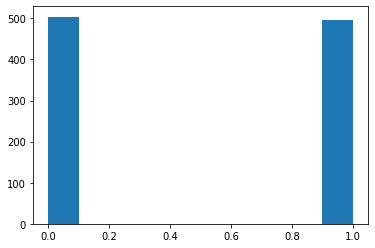

In [4]:
n, p = 1, 0.5 # number of trials, probability of each trial
s = np.random.binomial(n, p, 1000) # result of flipping a coin, tested 1000 times
plt.hist(s)

[Text(0.5, 0, 'Bernoulli'), Text(0, 0.5, 'Frequency')]

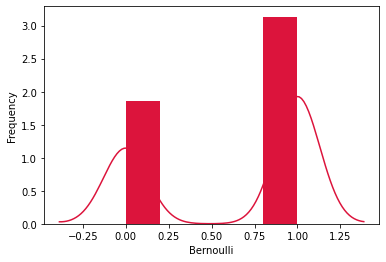

In [5]:
from scipy.stats import bernoulli

b_data = bernoulli.rvs(size=1000, p =0.6) # ndarray or scalar: Random variates of given size
ax = sns.distplot(b_data, kde=True, color='crimson',
                  hist_kws={'linewidth':25, 'alpha':1})
ax.set(xlabel='Bernoulli', ylabel='Frequency')

## Geometric distribution

In [6]:
from scipy.stats import geom

<BarContainer object of 12 artists>

(1.0, 15.0)

Text(0.5, 0, 'n')

Text(0, 0.5, 'p(n)')

Text(0.5, 1.0, 'First Sucess at n')

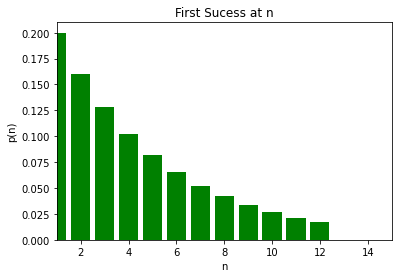

In [7]:
prob = 0.2
n =12
p = np.zeros(n)
q = np.zeros(n)

for k in range(1, n+1):
    p[k-1] = (1-prob)**(k-1)*prob
    q[k-1] = geom.pmf(k, prob)

plt.bar(range(1,13), p, color='green')
plt.xlim(1, 15)
plt.xlabel('n'); plt.ylabel('p(n)')
plt.title('First Sucess at n')

## Hypergeometric distribution

In [8]:
from scipy.stats import hypergeom

Suppose we have a collection of 1000 animals, of which 80 are dogs. Then if we want to know the probability of finding a given number of dogs if we choose at random 100 of the 1000 animals, we can initialize a frozen distribution and plot the probability mass function:

In [9]:
[M, n, N] = [1000, 80, 100]
rv = hypergeom(M, n, N)
x = np.arange(0, n+1)
pmf_dogs = rv.pmf(x)

Text(0.5, 0, '# of dogs in our group of chosen animals')

Text(0, 0.5, 'hypergeom PMF')

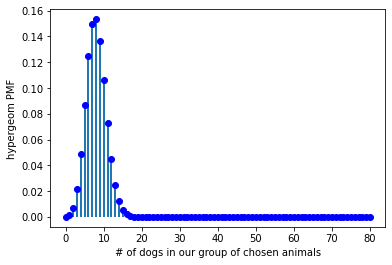

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pmf_dogs, 'bo')
ax.vlines(x, 0, pmf_dogs, lw=2)
ax.set_xlabel('# of dogs in our group of chosen animals')
ax.set_ylabel('hypergeom PMF')
plt.show()

## Poisson distribution

In [11]:
from scipy.stats import poisson

[Text(0.5, 0, 'Poisson'), Text(0, 0.5, 'Frequency')]

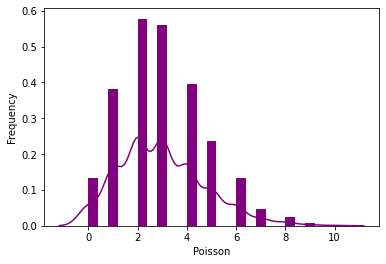

In [12]:
p_data = poisson.rvs(mu=3, size=1000)
ax = sns.distplot(p_data, kde=True, color='purple',
                  hist_kws={'linewidth':25, 'alpha':1})
ax.set(xlabel='Poisson', ylabel='Frequency')

## Binomial distribution

In [13]:
from scipy.stats import binom

In [14]:
binom.rvs?

In [17]:
binom.rvs(n=100, p=0.5) # 100번을 trials 해서 성공확률(0.5)로 성공이 나올 trials
binom.rvs(n=100, p=0.5, size=10) # {100번을 trials 해서 성공확률(0.5)로 성공이 나올 trials}를 size 만큼 수행

51

array([47, 52, 52, 43, 50, 45, 52, 51, 48, 47])

[Text(0.5, 0, 'Binomial'), Text(0, 0.5, 'Frequency')]

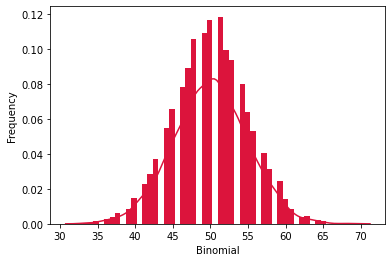

In [18]:
b_data = binom.rvs(n=100, p=0.5, size=10000)
ax = sns.distplot(b_data, kde=True, color='crimson',
                  hist_kws={'linewidth':25, 'alpha':1})
ax.set(xlabel='Binomial', ylabel='Frequency')

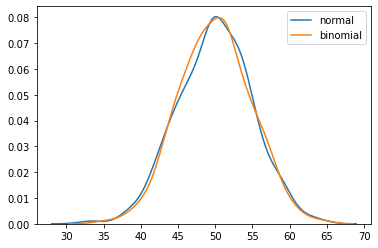

In [17]:
sns.distplot(np.random.normal(loc=50, scale=5, size=1000), hist=False, label='normal') # loc=평균, scale=표준편차
sns.distplot(np.random.binomial(n=100, p=0.5, size=1000), hist=False, label='binomial')

## 이항분포와 포아송분포

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial')]

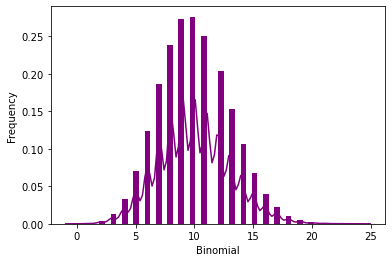

In [18]:
b_data = binom.rvs(n=100, p=0.1, size=100000)
ax = sns.distplot(b_data, kde=True, color='purple',
                  hist_kws={'linewidth':25, 'alpha':1})
ax.set(xlabel='Binomial', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Poisson')]

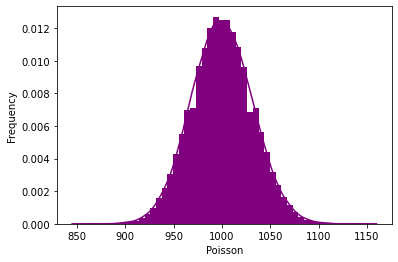

In [19]:
np = 0.01*100000
p_data = poisson.rvs(mu=np, size=100000)
ax = sns.distplot(p_data, kde=True, color='purple',
                  hist_kws={'linewidth':25, 'alpha':1})
ax.set(xlabel='Poisson', ylabel='Frequency')

## Normal distribution

In [19]:
import numpy as np

[Text(0.5, 0, 'Normal'), Text(0, 0.5, 'Frequency')]

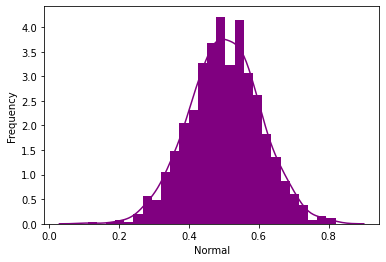

In [20]:
mu, sigma = 0.5, 0.1
n_data = np.random.normal(mu,sigma, 1000)
ax = sns.distplot(n_data, kde=True, color='purple',
                  hist_kws={'linewidth':25, 'alpha':1})
ax.set(xlabel='Normal', ylabel='Frequency')

In [ ]:
def ProbWinMatch(pmf):
    total = 0
    for p, prob in pmf.Items():
        total += prob * (1-p)**3
    return total

(array([0.02811092, 0.        , 0.08433275, 0.08433275, 0.3654419 ,
        0.59032923, 1.18065846, 1.68665494, 2.67053699, 3.37330988,
        3.85119545, 3.62630813, 3.71064087, 2.72675882, 1.63043311,
        1.26499121, 0.70277289, 0.28110916, 0.16866549, 0.08433275]),
 array([0.10912168, 0.14469505, 0.18026842, 0.21584179, 0.25141516,
        0.28698853, 0.3225619 , 0.35813527, 0.39370864, 0.42928201,
        0.46485538, 0.50042875, 0.53600212, 0.57157549, 0.60714886,
        0.64272223, 0.6782956 , 0.71386897, 0.74944234, 0.78501571,
        0.82058908]),
 <BarContainer object of 20 artists>)

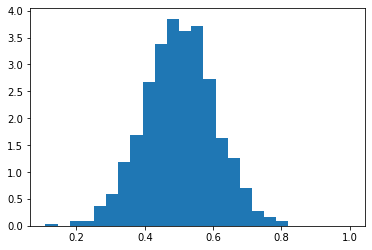

In [21]:
plt.hist(n_data, 20, density=True) # y축을 normalize해줌
bins=1
plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))* np.exp(-(bins-mu)**2/(2*sigma**2)),
         linewidth=3, color='y')

# <font color='red'> 2. Probability mass fuction

In [23]:
np.random.randint(10) 

6

In [24]:
m = np.random.randint(2, 10, 40)
size = len(m)
m

array([7, 5, 9, 6, 2, 5, 9, 7, 5, 2, 6, 9, 9, 3, 2, 2, 2, 2, 4, 5, 3, 2,
       3, 2, 7, 2, 3, 2, 9, 6, 4, 9, 7, 9, 9, 5, 3, 7, 6, 8])

In [25]:
import pandas as pd

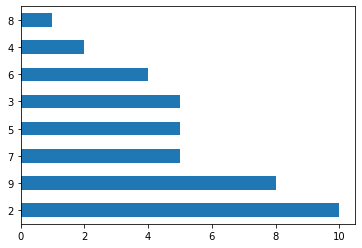

In [26]:
df = pd.DataFrame(m)
df[0].value_counts().plot(kind='barh')

In [27]:
data = pd.DataFrame(df[0].value_counts())
data

,0
2,10
9,8
7,5
5,5
3,5
6,4
4,2
8,1


In [28]:
data.columns = ['counts']
data

,counts
2,10
9,8
7,5
5,5
3,5
6,4
4,2
8,1


In [29]:
data['prob'] = data['counts']/size
data

,counts,prob
2,10,0.250
9,8,0.200
7,5,0.125
5,5,0.125
3,5,0.125
6,4,0.100
4,2,0.050
8,1,0.025


<BarContainer object of 8 artists>

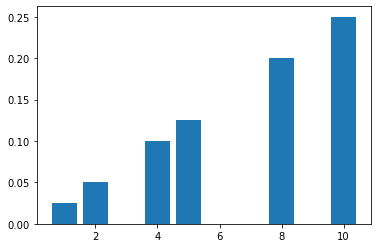

In [30]:
plt.bar(data['counts'], data['prob']) # probability mass function

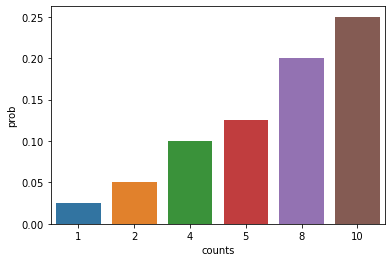

In [31]:
sns.barplot(data['counts'], data['prob'])

In [32]:
tips =sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [33]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '결측치 수(null)' : df.isnull().sum(),
                       '결측치 비율' : (df.isnull().sum()/df.shape[0]).round(4)*100,
                       '고유값 수(nunique)' : df.nunique()})
    return tf

In [34]:
summary(tips)

,데이터형태(dtypes),결측치 수(null),결측치 비율,고유값 수(nunique)
total_bill,float64,0,0.0,229
tip,float64,0,0.0,123
sex,category,0,0.0,2
smoker,category,0,0.0,2
day,category,0,0.0,4
time,category,0,0.0,2
size,int64,0,0.0,6


In [35]:
data = tips[['day','tip', 'size']].groupby('day').tip.agg(['sum', 'count'])
data

,sum,count
day,,
Thur,171.83,62
Fri,51.96,19
Sat,260.40,87
Sun,247.39,76


In [36]:
data.reset_index(inplace=True)

In [37]:
data

,day,sum,count
0,Thur,171.83,62
1,Fri,51.96,19
2,Sat,260.40,87
3,Sun,247.39,76


In [38]:
data['pmf'] = data['count']/data['count'].sum()
data['pmf'].sum()
data

1.0

,day,sum,count,pmf
0,Thur,171.83,62,0.254098
1,Fri,51.96,19,0.077869
2,Sat,260.40,87,0.356557
3,Sun,247.39,76,0.311475


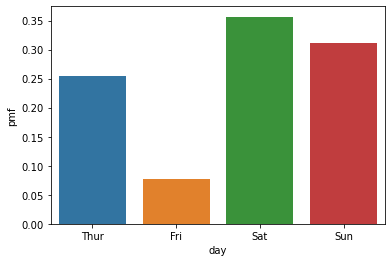

In [39]:
sns.barplot(data['day'], data['pmf'])

# <font color='red'> 3. Probability density fuction

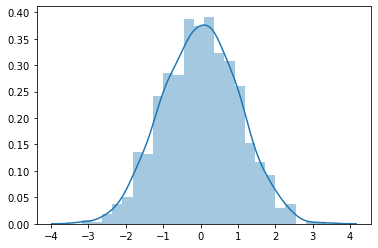

In [40]:
data= np.random.normal(size=1000)
data = np.append(data, [1.5, 1.5, 1.5])
sns.distplot(data)

In [97]:
mu = 20
sigma = 2
h = sorted(np.random.normal(mu, sigma, 100))

In [98]:
import scipy.stats as stats

In [99]:
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) # it is a fitting!

<Figure size 720x216 with 0 Axes>

(array([0.04325186, 0.04325186, 0.11894261, 0.11894261, 0.23788522,
        0.10812964, 0.17300743, 0.09731668, 0.10812964, 0.03243889]),
 array([15.04165625, 15.96647202, 16.89128779, 17.81610357, 18.74091934,
        19.66573512, 20.59055089, 21.51536667, 22.44018244, 23.36499822,
        24.28981399]),
 <BarContainer object of 10 artists>)

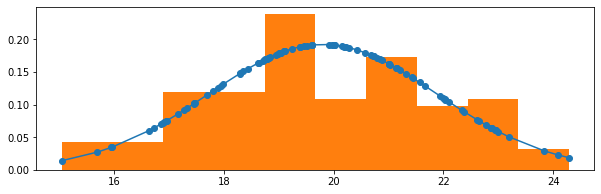

In [100]:
plt.figure(figsize=(10,3))
plt.plot(h, fit, '-o')
plt.hist(h, density=True)

# <font color='red'> 4. Cumulative distribution fuction

In [101]:
import scipy.stats as stats

In [102]:
x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1

pdf = stats.norm.pdf(x, mu, sigma) # the normal pdf
cdf = stats.norm.cdf(x, mu, sigma) # the normal cdf

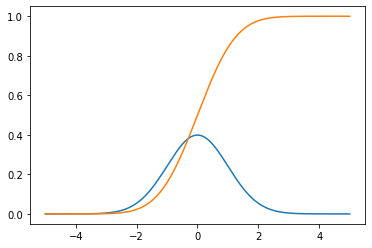

In [103]:
plt.plot(x, pdf, label='pdf')
plt.plot(x, cdf, label='cdf')

(array([0.04325186, 0.04325186, 0.11894261, 0.11894261, 0.23788522,
        0.10812964, 0.17300743, 0.09731668, 0.10812964, 0.03243889]),
 array([15.04165625, 15.96647202, 16.89128779, 17.81610357, 18.74091934,
        19.66573512, 20.59055089, 21.51536667, 22.44018244, 23.36499822,
        24.28981399]),
 <BarContainer object of 10 artists>)

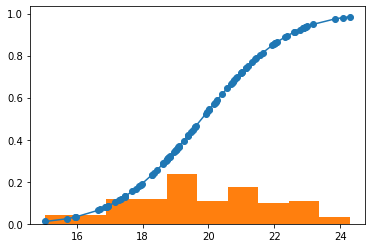

In [104]:
fit = stats.norm.cdf(h, np.mean(h), np.std(h)) # it is a fitting!

plt.plot(h, fit, '-o')
plt.hist(h, density=True)

# 2 주차 End